In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import os
import pandas_ta as ta
import matplotlib.pyplot as plt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.hierarchical_portfolio import HRPOpt


In [16]:

# 'AMCR',

ticks = ['AAPL', 'MSFT', 'ACLS', 'UBER', 'AVNW', 'LUV']
ticks.append('IMGN')
ticks.append('ARCC')
#ticks.append('GRPN')
#ticks.append('AINV')
#ticks.append('^GSPC')
ticks.append('APO')
ticks.append('YOU')
#ticks.append('VOD')
#ticks.append('STLA')
#ticks.append('SG')
#ticks.append('COIN')

df = yf.download(ticks, start = '2010-01-01', progress = False)['Close']

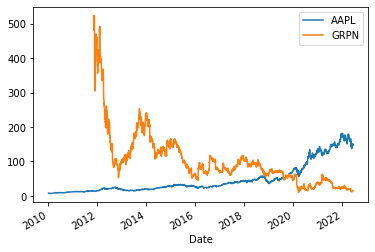

In [3]:
cov = df.cov()

#plt.imshow(cov)
#sum(sum([cov[i][:-1] for i in cov if i != '^GSPC']))

df.AAPL.plot()
df.GRPN.plot()
plt.legend()

In [17]:

HRP = HRPOpt(df.pct_change())

HRP.optimize()


OrderedDict([('AAPL', 0.14815939927224644),
             ('ACLS', 0.030566277370408144),
             ('APO', 0.10376929776968057),
             ('ARCC', 0.20715156613214036),
             ('AVNW', 0.06929079982106934),
             ('IMGN', 0.03997074510469324),
             ('LUV', 0.17309244754239678),
             ('MSFT', 0.18337665320922739),
             ('UBER', 0.026502906856837705),
             ('YOU', 0.01811990692130005)])

In [18]:


HRP.portfolio_performance(True)


Expected annual return: 16.9%
Annual volatility: 22.8%
Sharpe Ratio: 0.65


(0.1688576700504377, 0.22793814175379976, 0.6530616986920147)

In [8]:

mu = mean_historical_return(df)
S = CovarianceShrinkage(df).ledoit_wolf()

ef = EfficientFrontier(mu, S)

ef.add_constraint(lambda x : x >= 0.02)
ef.add_constraint(lambda x : x <= 0.45)

weights = ef.max_sharpe()

ef.portfolio_performance(verbose=True)


Expected annual return: 13.8%
Annual volatility: 21.3%
Sharpe Ratio: 0.56


(0.1383756755868496, 0.21289845746326352, 0.556019414125045)